In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca AutoML autokeras
import autokeras as ak

# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark -a "Verções bibliotecas" --iversions

import warnings
warnings.filterwarnings("ignore")

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.15


# Base dados

In [2]:
# Base geral
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# Visualizando os 5 primeiros dados
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Visualizando os 5 últimos dados
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
# Visualizando linhas e colunas
data.shape

(5110, 12)

In [6]:
# Informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Tipo dados
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Amostra simples  
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
847,49949,Male,44.0,0,0,Yes,Private,Urban,58.47,24.4,never smoked,0
4160,71966,Female,18.0,0,0,No,Never_worked,Urban,81.73,21.6,never smoked,0
1846,61641,Male,14.0,0,0,No,children,Rural,149.42,20.6,Unknown,0
4376,37866,Female,76.0,0,0,Yes,Self-employed,Urban,193.61,37.6,never smoked,0
3830,29419,Female,32.0,0,0,Yes,Private,Urban,81.92,38.0,never smoked,0


In [9]:
# Colunas númericas
nub = ["hypertension", 
       "heart_disease", 
       "avg_glucose_level", 
       "bmi"]

# Coluna categorica
cat = ["gender", 
       "ever_married", 
       "work_type", 
       "Residence_type", 
       "smoking_status"]

# Coluna target
target = ["stroke"]

In [10]:
# Variavel target
target = ["stroke"]

In [11]:
# Total
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Explorando as variáveis númericas

In [12]:
# Resumo variáveis numéricas
data[nub].describe()

,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,106.147677,28.893237
std,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,55.120000,10.300000
25%,0.000000,0.000000,77.245000,23.500000
50%,0.000000,0.000000,91.885000,28.100000
75%,0.000000,0.000000,114.090000,33.100000
max,1.000000,1.000000,271.740000,97.600000


In [13]:
# Listando o total por categoria de cada variável categórica
for col in cat:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(data[col].value_counts())
    print()

Total de Registros Por Categoria da Variável gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Total de Registros Por Categoria da Variável ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Total de Registros Por Categoria da Variável work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Total de Registros Por Categoria da Variável Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Total de Registros Por Categoria da Variável smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



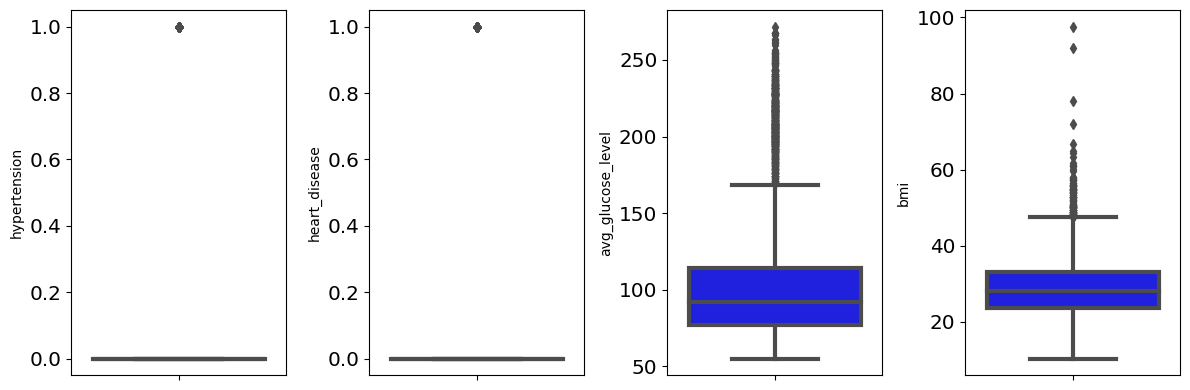

In [14]:
features = nub
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = data[features[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

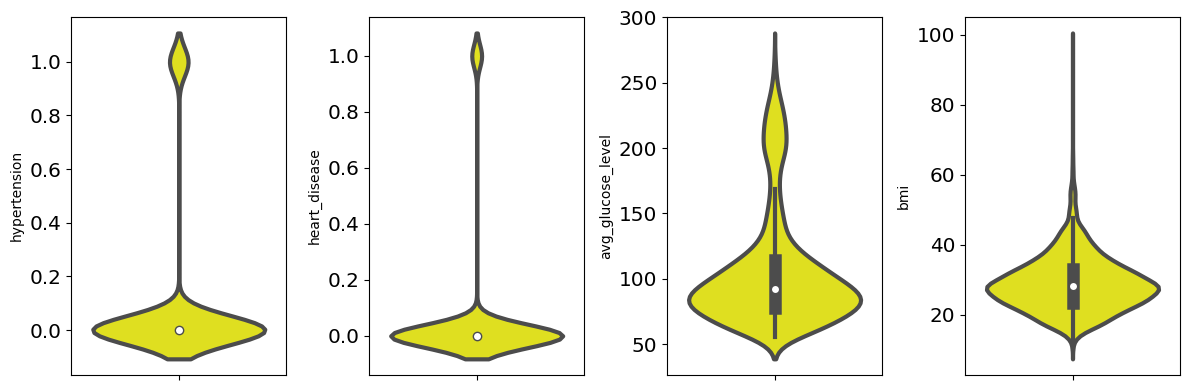

In [15]:
for i in range(0, len(nub)):
    plt.subplot(1, len(nub), i+1)
    sns.violinplot(y = data[nub[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

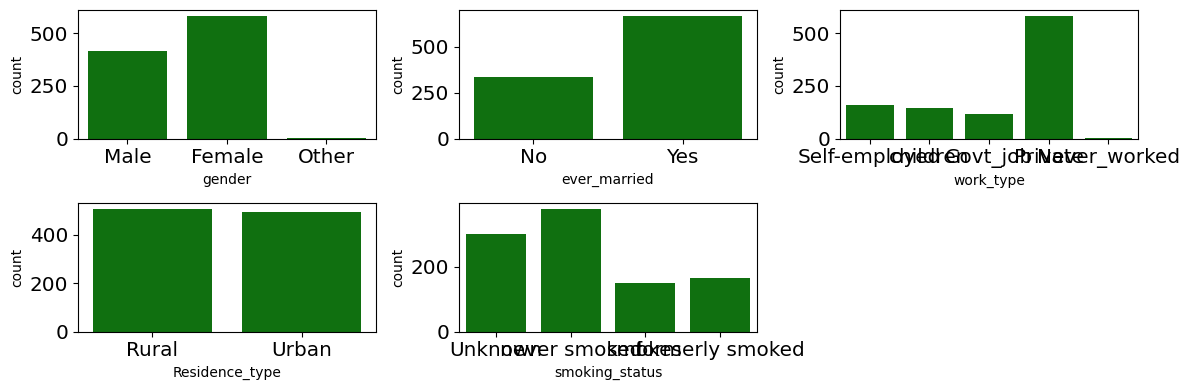

In [16]:
df_sample = data.sample(1000, random_state = 42)
for i in range(0, len(cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cat[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot: xlabel='stroke', ylabel='count'>

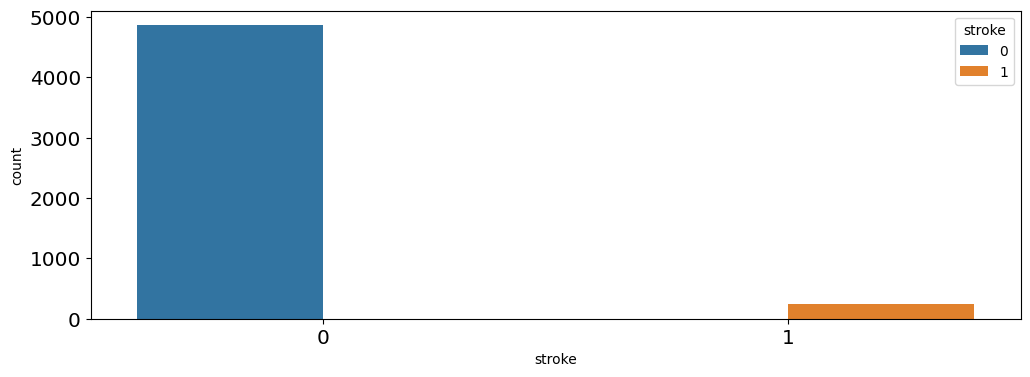

In [17]:
# Count Plot da variável target
sns.countplot(data = data, x = data['stroke'], hue = 'stroke')

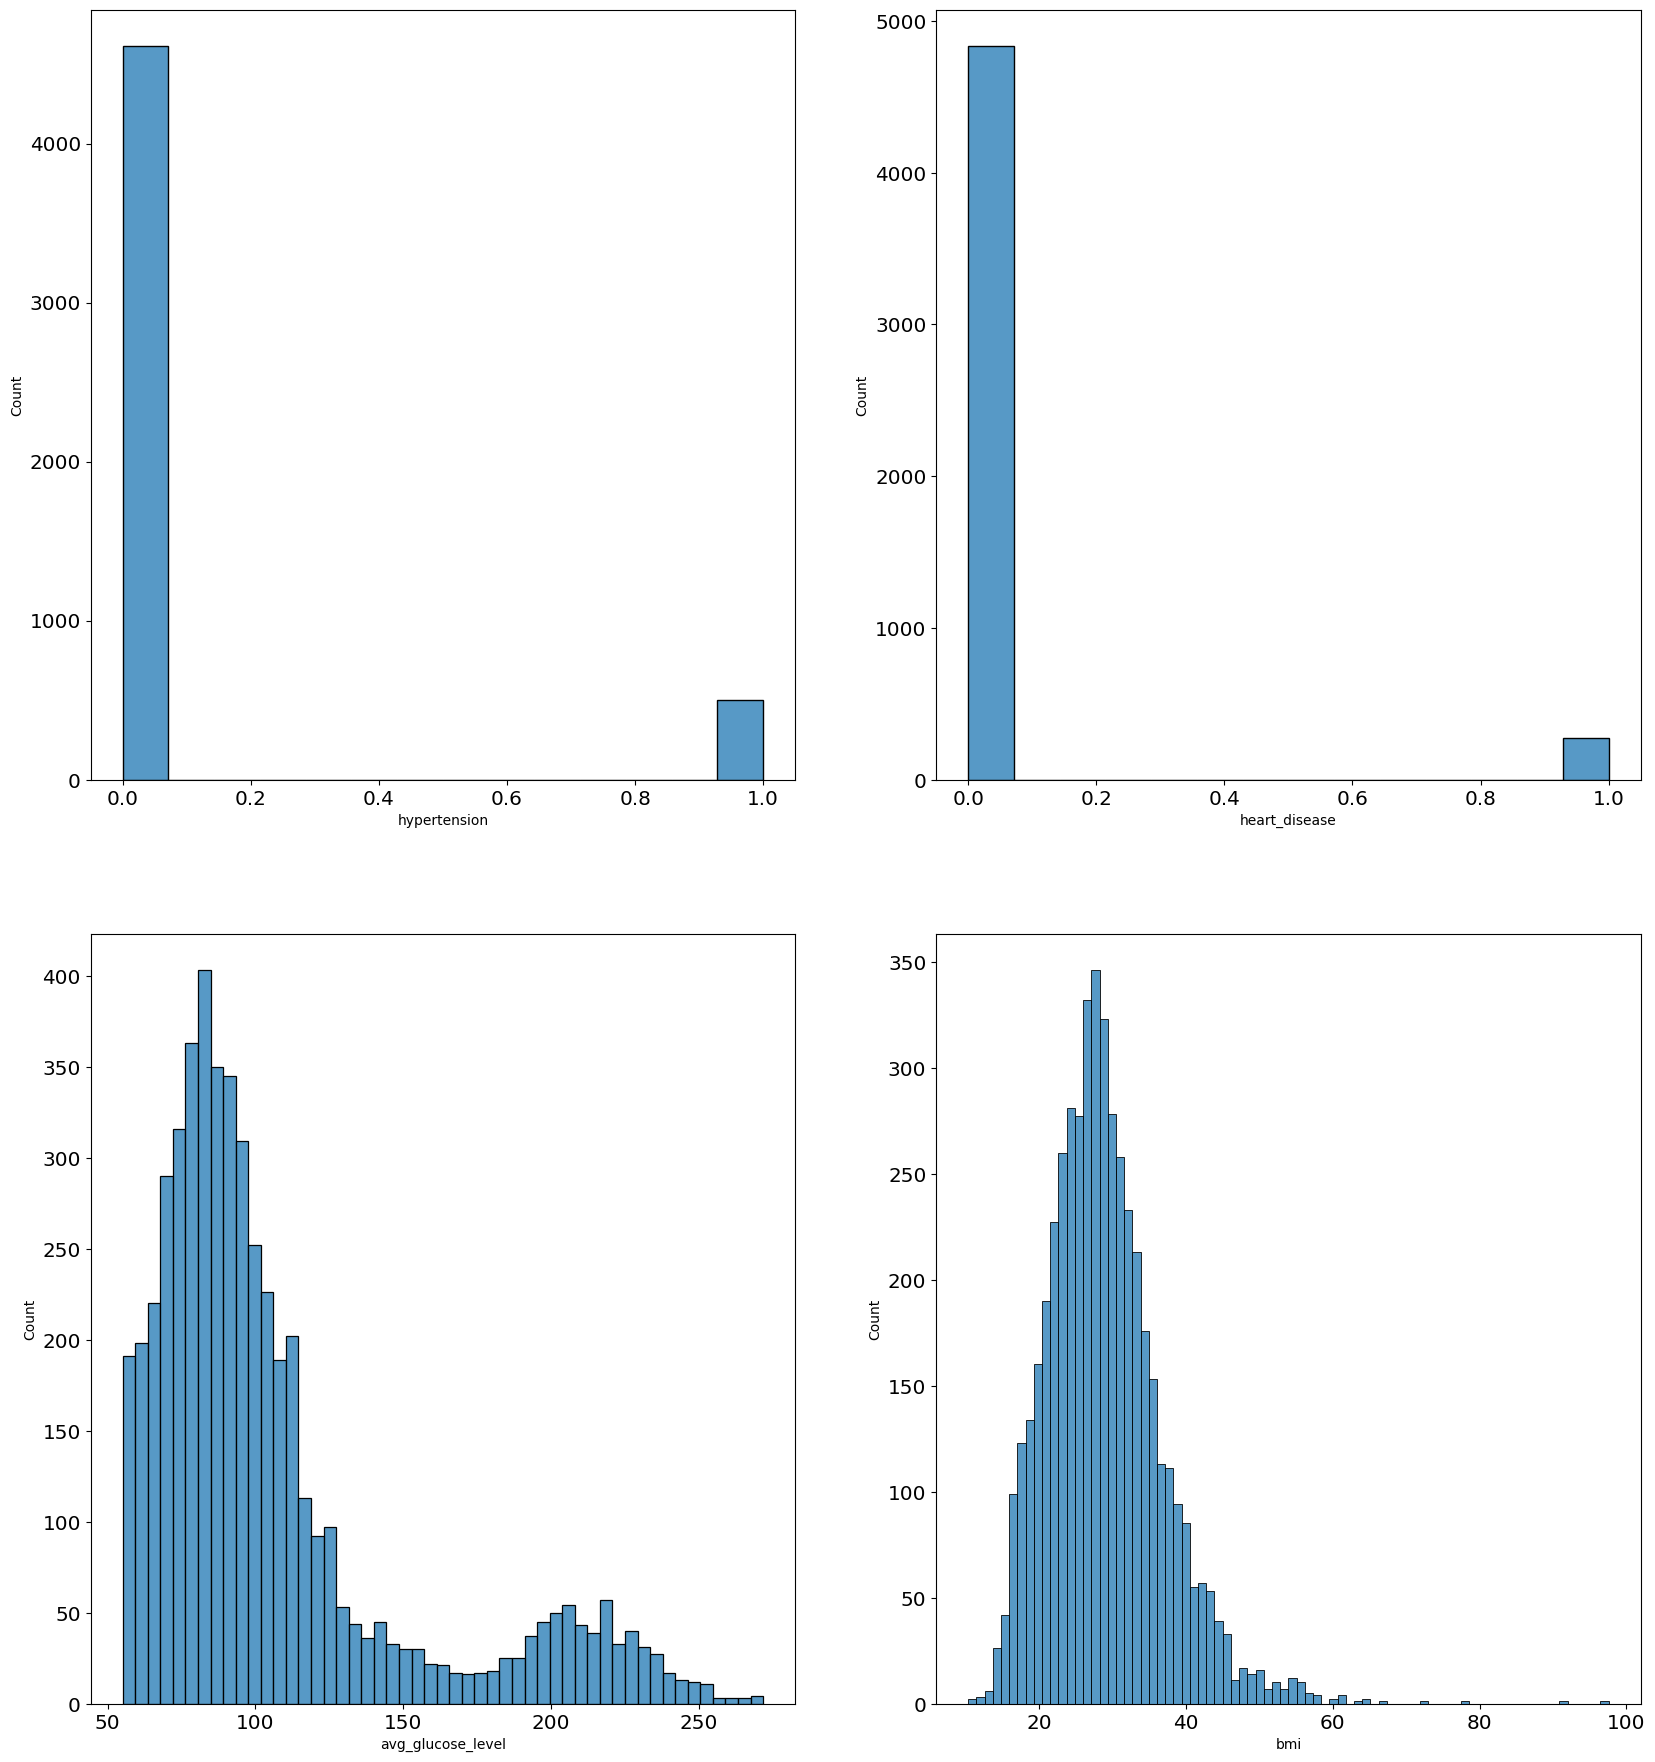

In [18]:
# Gráfico subplot com as variaveis númericas
fig , axes = plt.subplots(nrows=2 , ncols=2 , figsize = (20, 22))

ax = sns.histplot(data["hypertension"] , ax=axes[0,0])
ax = sns.histplot(data["heart_disease"] ,  ax=axes[0,1])
ax = sns.histplot(data["avg_glucose_level"] , ax=axes[1,0])
ax = sns.histplot(data["bmi"], ax=axes[1,1] )

plt.show()

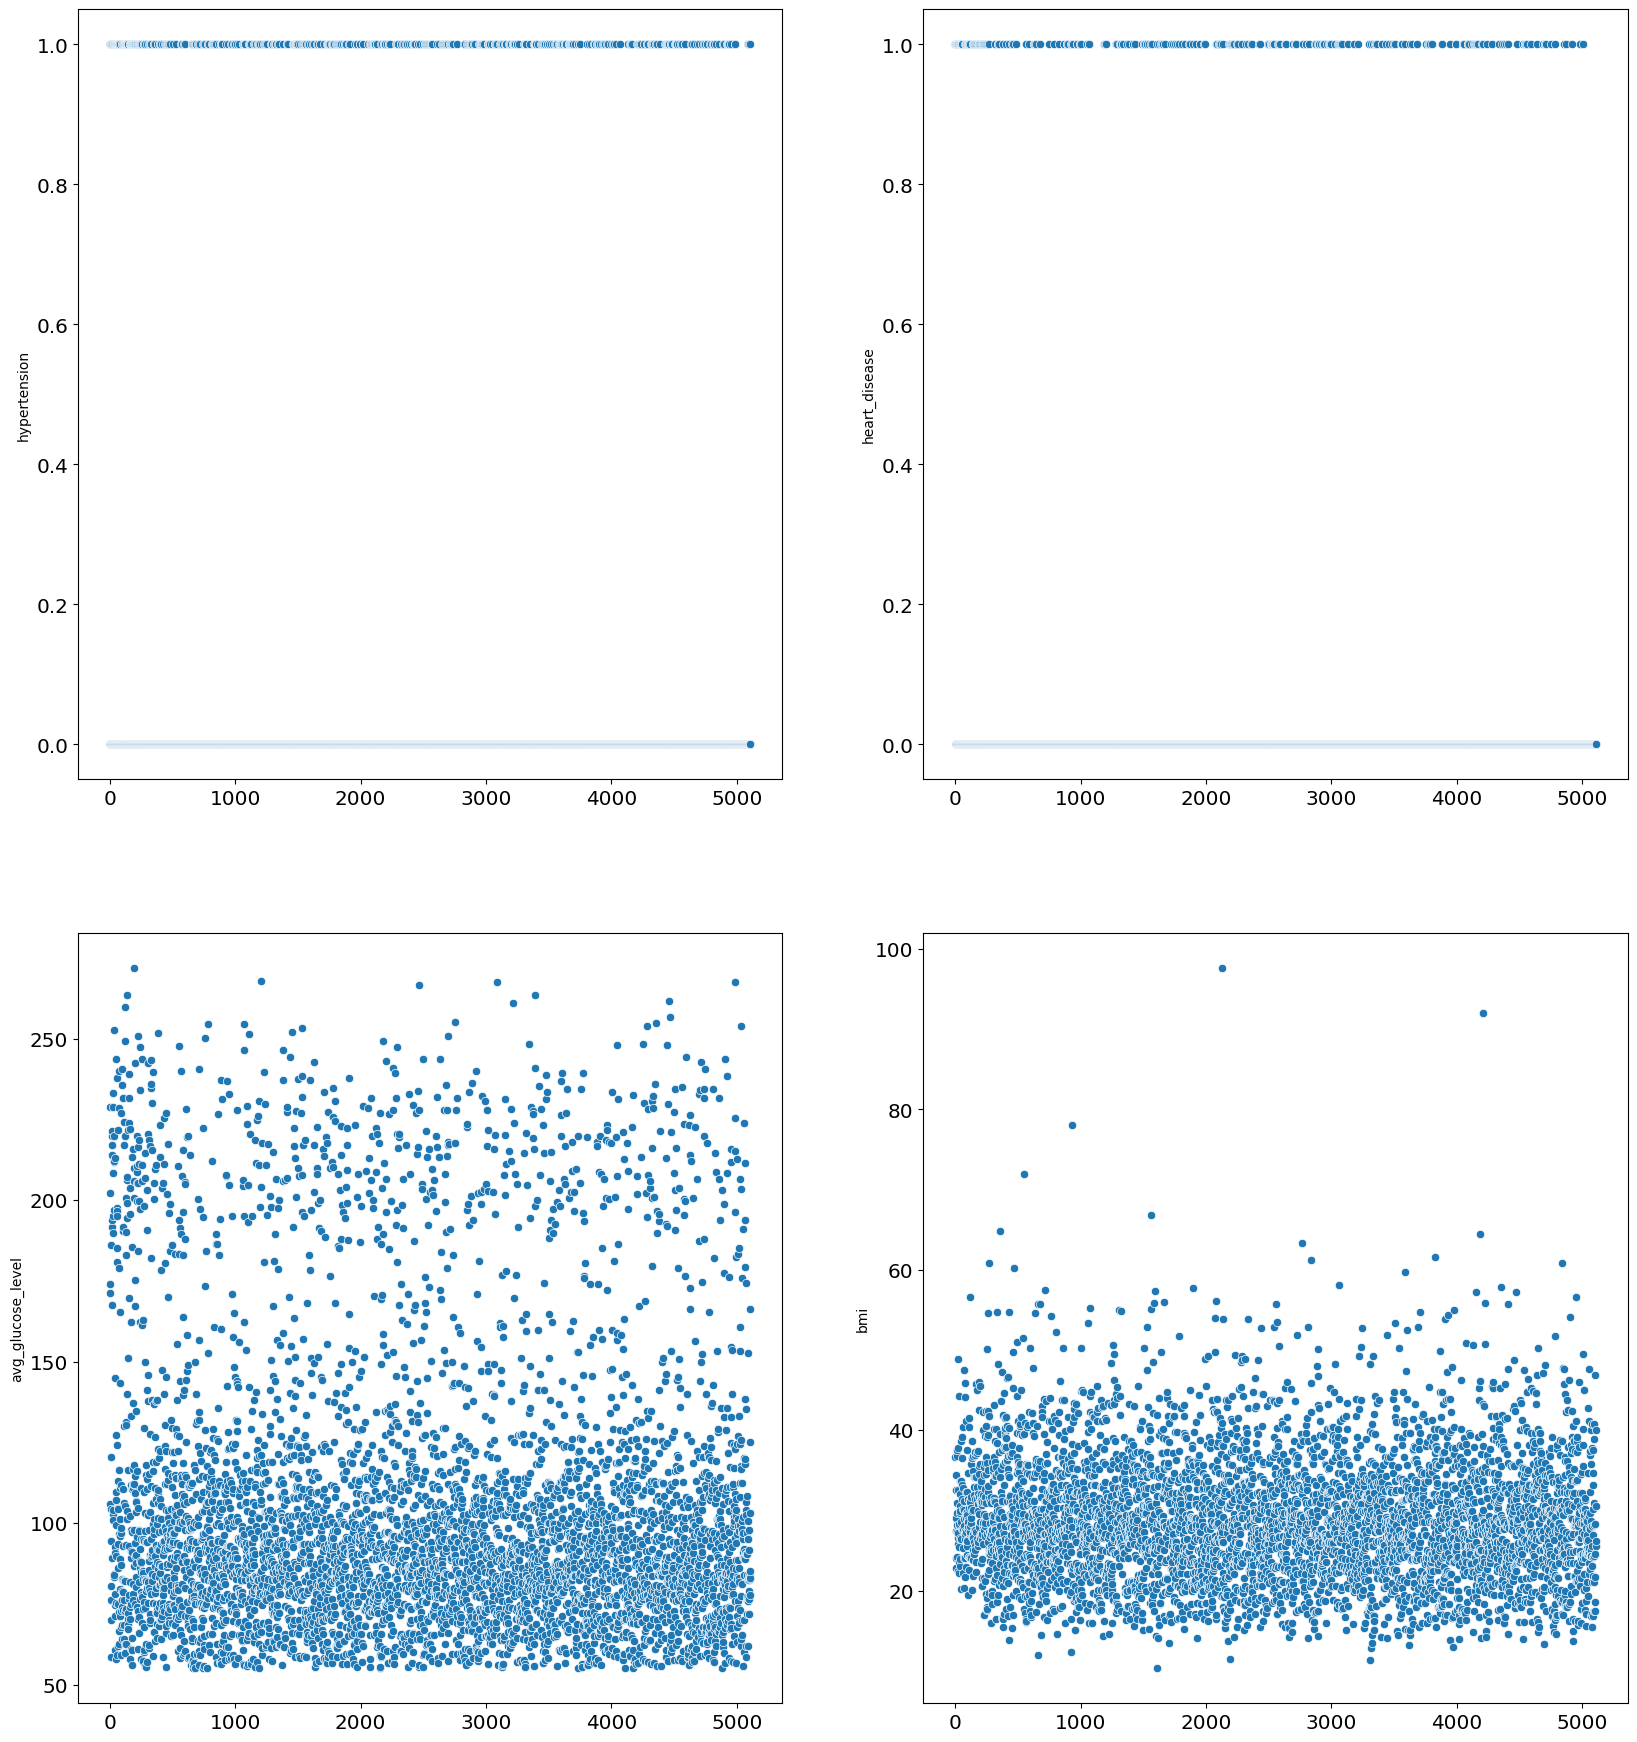

In [19]:
# Gráfico subplot com as variaveis númericas 2
fig , axes = plt.subplots(nrows=2 , ncols=2 , figsize = (20, 22))

ax = sns.scatterplot(data["hypertension"] , ax=axes[0,0])
ax = sns.scatterplot(data["heart_disease"] ,  ax=axes[0,1])
ax = sns.scatterplot(data["avg_glucose_level"] , ax=axes[1,0])
ax = sns.scatterplot(data["bmi"], ax=axes[1,1] )

plt.show()

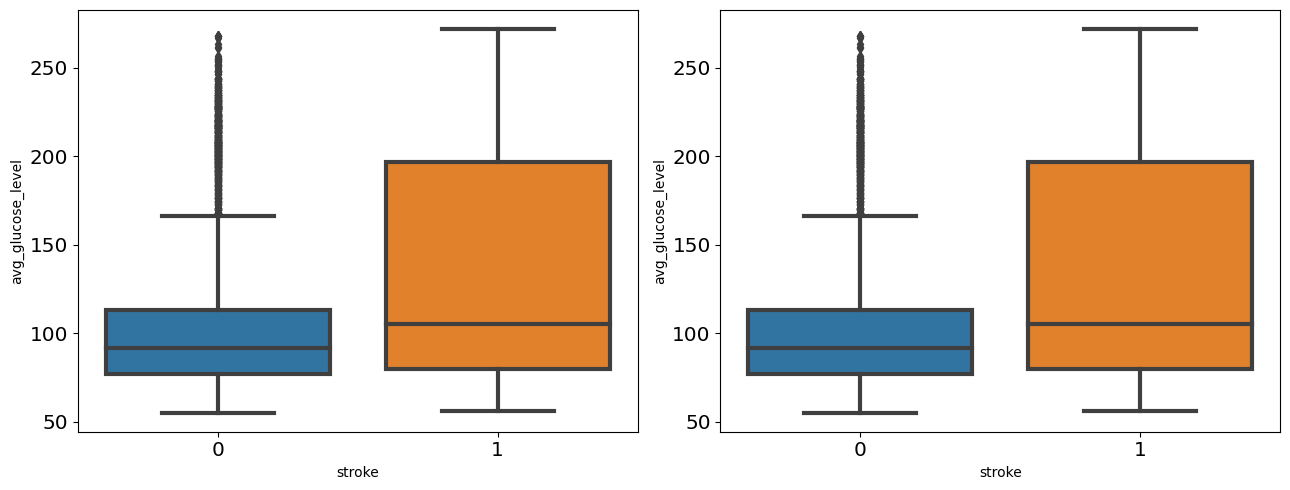

In [20]:
# Gráfico subplot com boxplot com a variavel target 
fig,ax = plt.subplots(1,2,figsize=(13,5))

sns.boxplot(y=data['avg_glucose_level'],x=data['stroke'],ax=ax[0])
sns.boxplot(y=data['avg_glucose_level'],x=data['stroke'],ax=ax[1])
plt.tight_layout()

# Colunas Categóricas x Variável Target

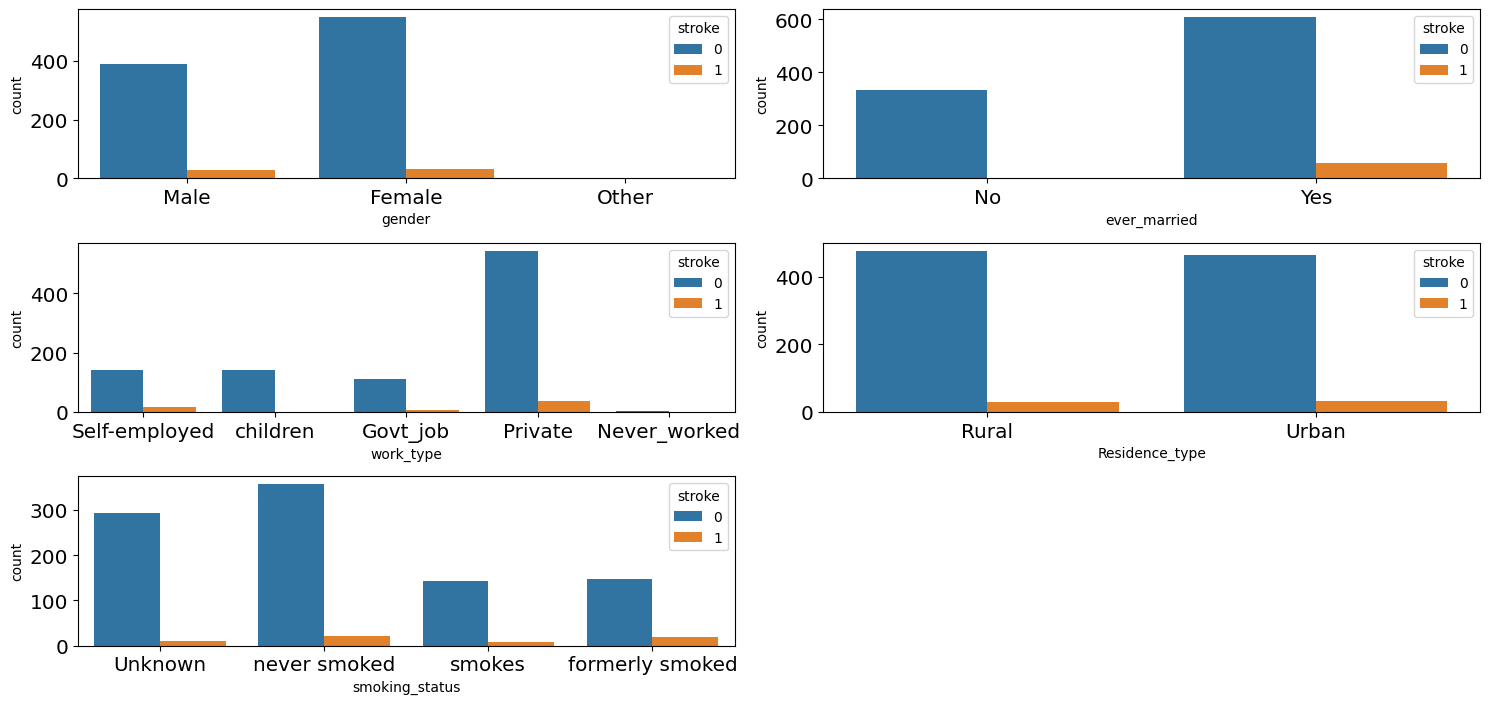

In [21]:
# Colunas Categóricas x Variável Target
plt.figure(figsize = (15, 9))
features = cat
for i in range(0, len(features)):
    plt.subplot(4, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'stroke')
    plt.tight_layout()

### Análise Bivariada - Mapa de Correlação

In [22]:
# Correlação dados da coluna númerica
data[nub].corr()

,hypertension,heart_disease,avg_glucose_level,bmi
hypertension,1.000000,0.108306,0.174474,0.167811
heart_disease,0.108306,1.000000,0.161857,0.041357
avg_glucose_level,0.174474,0.161857,1.000000,0.175502
bmi,0.167811,0.041357,0.175502,1.000000


In [23]:
# Correlação dados da coluna númerica
corr_df = data[nub].corr()
corr_df

,hypertension,heart_disease,avg_glucose_level,bmi
hypertension,1.000000,0.108306,0.174474,0.167811
heart_disease,0.108306,1.000000,0.161857,0.041357
avg_glucose_level,0.174474,0.161857,1.000000,0.175502
bmi,0.167811,0.041357,0.175502,1.000000


<AxesSubplot: >

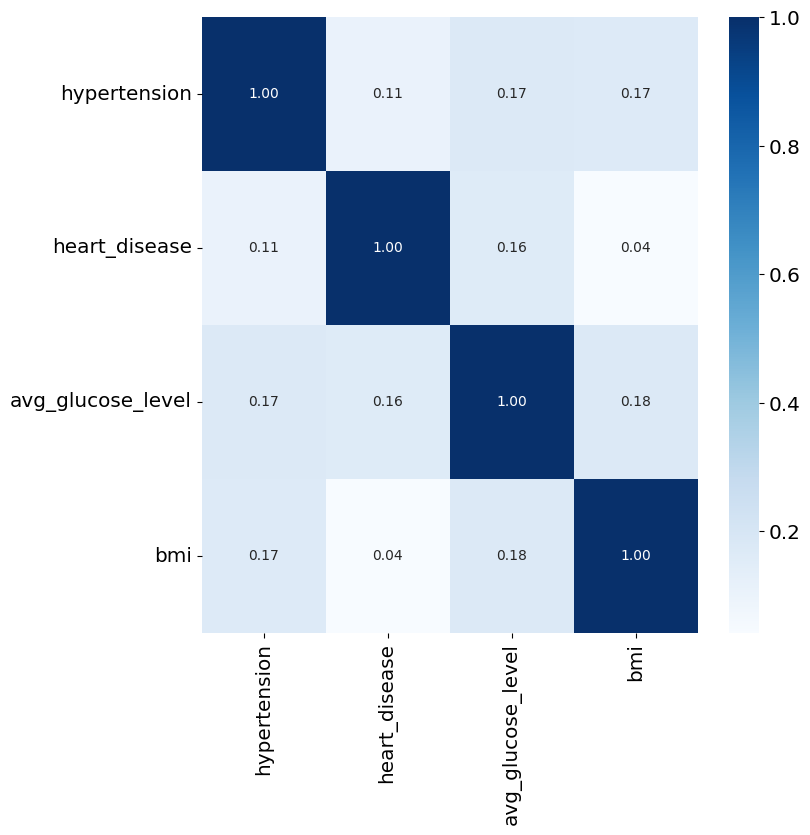

In [24]:
# Gráfico correlação colunas númerica
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

### Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

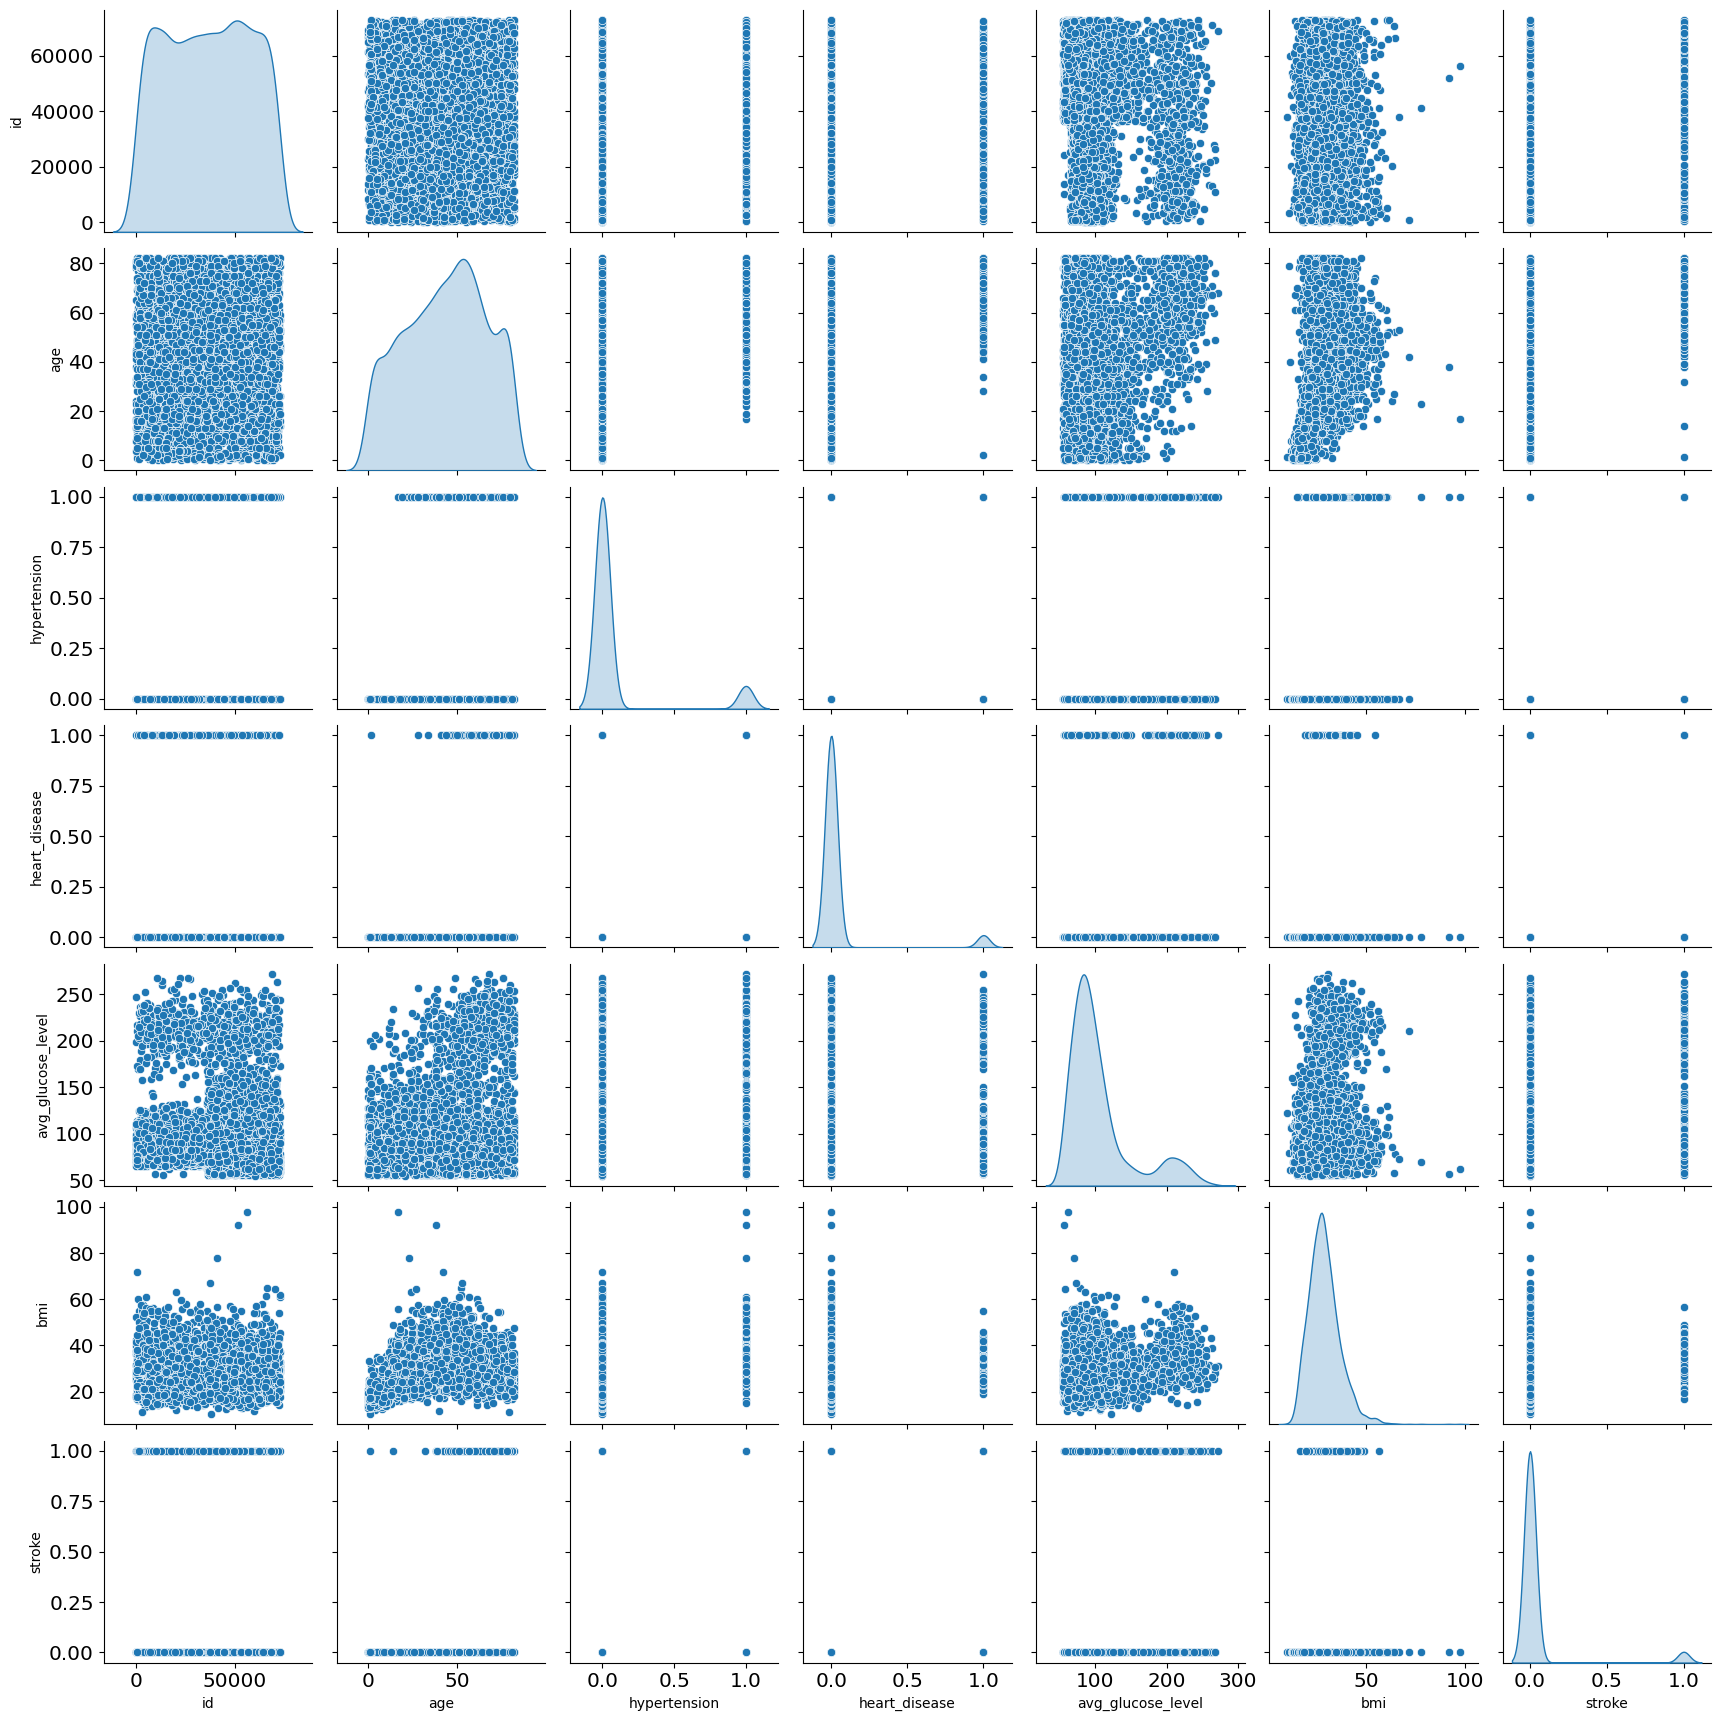

In [25]:
# Pair plot geral
plt.figure(figsize = (15, 15))
sns.pairplot(data, diag_kind = 'kde')

<Figure size 1500x1500 with 0 Axes>

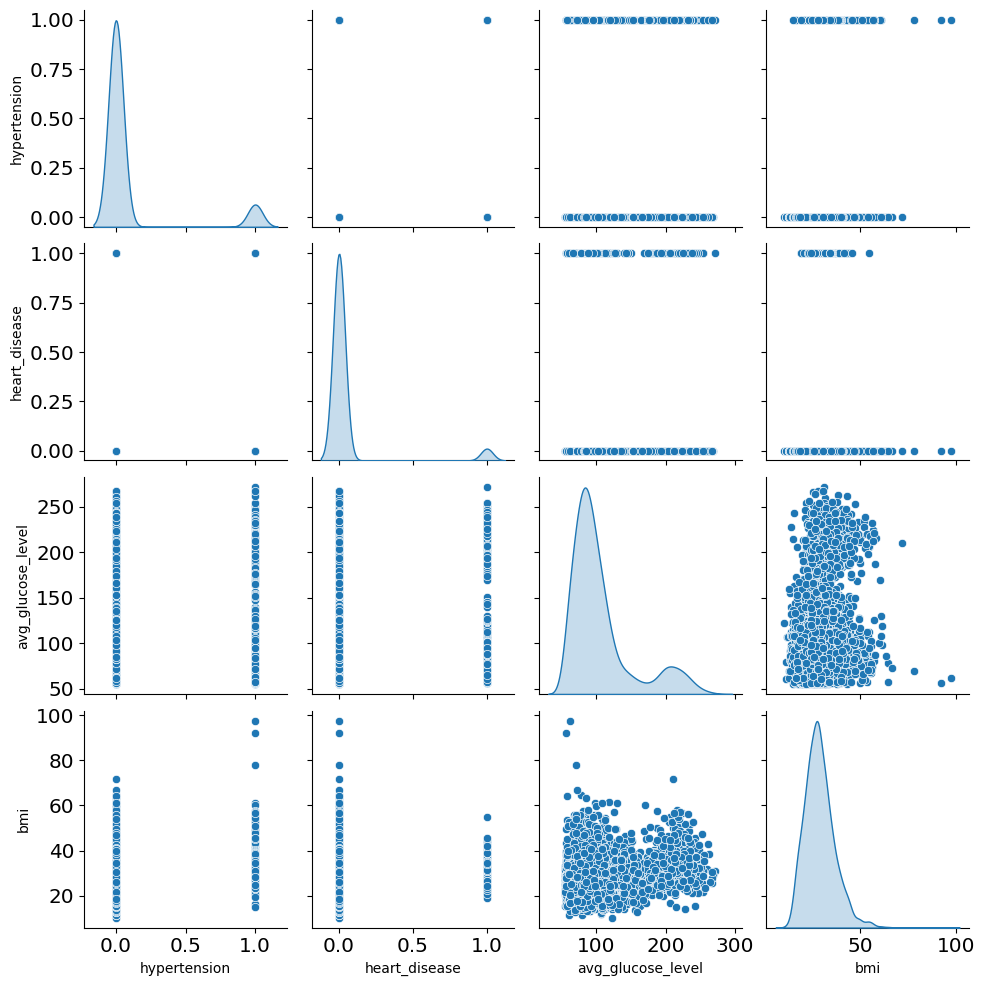

In [26]:
# Pair plot geral variaveis númericas
plt.figure(figsize = (15, 15))
sns.pairplot(data[nub], diag_kind = 'kde')

# Modelo AutoML

In [37]:
x = data["stroke"]

In [38]:
stroke = data["stroke"]

In [36]:
# Biblioteca AutoML autokeras
import autokeras as ak

# Initialize the structured data classifier.
# It tries 3 different models.
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)  

# Feed the structured data classifier with training data.
clf.fit(data, x, epochs=10)

Trial 3 Complete [00h 00m 10s]

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 40s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
160/160 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8215
Epoch 2/10
160/160 [==============================] - 1s 3ms/step - loss: 0.1917 - accuracy: 0.9513
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.0699 - accuracy: 0.9673
Epoch 4/10
160/160 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9982
Epoch 5/10
160/160 [==============================] - 1s 3ms/step - loss: 0.0071 - accuracy: 0.9992
Epoch 6/10
160/160 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 7/10
160/160 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
160/160 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
160/160 [==============================] - 0s 3ms/step - 

INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


In [41]:
# Predict with the best model.
predicted_y = clf.predict(data)
predicted_y

160/160 [==============================] - 0s 3ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [45]:
# Evaluate the best model with testing data.
print(clf.evaluate(data, x))

160/160 [==============================] - 1s 2ms/step - loss: 7.4039e-04 - accuracy: 1.0000
[0.0007403888157568872, 1.0]


# Modelo AutoKeras - 2 - Data Format

In [51]:
x_train = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(type(x_train))  # pandas.DataFrame
y_train = x_train.pop("stroke")
print(type(y_train))  # pandas.Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [52]:
# You can also use pandas.DataFrame for y_train.
y_train = pd.DataFrame(y_train)
print(type(y_train))  # pandas.DataFrame

# You can also use numpy.ndarray for x_train and y_train.
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
print(type(x_train))  # numpy.ndarray
print(type(y_train))  # numpy.ndarray

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
# Preparing testing data.
x_test = pd.read_csv("healthcare-dataset-stroke-data.csv")
y_test = x_test.pop("stroke")

In [55]:
# It tries 10 different models.
clf = ak.StructuredDataClassifier(overwrite=True, 
                                  max_trials=3)

# Feed the structured data classifier with training data.
clf.fit(x_train, 
        y_train, 
        epochs=10)

Trial 3 Complete [00h 00m 29s]
val_accuracy: 0.9773175716400146

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 21s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
160/160 [==============================] - 2s 3ms/step - loss: 0.2731 - accuracy: 0.8822
Epoch 2/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9513
Epoch 3/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2262 - accuracy: 0.9513
Epoch 4/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9513
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9513
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9513
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9513
Epoch 8/10
160/160 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.9513
Epoch 9/10
160/160 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9513
Epoch 10/10
160/160 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9513

INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


In [ ]:
plt.plot()

In [57]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
predicted_y

160/160 [==============================] - 1s 3ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [58]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

160/160 [==============================] - 3s 9ms/step - loss: 0.1745 - accuracy: 0.9513
[0.17452514171600342, 0.9512720108032227]


In [63]:
import tensorflow as tf

train_set = tf.data.Dataset.from_tensor_slices((x_train.astype(np.unicode), y_train))
test_set = tf.data.Dataset.from_tensor_slices((x_test.to_numpy().astype(np.unicode), y_test))

clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)

# Feed the tensorflow Dataset to the classifier.
clf.fit(train_set, epochs=10)

# Predict with the best model.
predicted_y = clf.predict(test_set)

# Evaluate the best model with testing data.
print(clf.evaluate(test_set))

Trial 3 Complete [00h 00m 11s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 00m 47s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/10
160/160 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.8503
Epoch 2/10
160/160 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9513
Epoch 3/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9513
Epoch 4/10
160/160 [==============================] - 1s 3ms/step - loss: 0.2187 - accuracy: 0.9509
Epoch 5/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9511
Epoch 6/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9511
Epoch 7/10
160/160 [==============================] - 0s 3ms/step - loss: 0.2043 - accuracy: 0.9513
Epoch 8/10
160/160 [==============================] - 1s 3ms/step - loss: 0.2017 - accuracy: 0.9513
Epoch 9/10
160/160 [==============================] - 1s 3ms/step - loss: 0.1994 - accuracy: 0.9513
Epoch 10/10
160/160 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9513

INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


INFO:tensorflow:Assets written to: .\structured_data_classifier\best_model\assets


160/160 [==============================] - 1s 2ms/step - loss: 0.1772 - accuracy: 0.9513
[0.17720790207386017, 0.9512720108032227]


# Customized Search Space

In [66]:
input_node = ak.StructuredDataInput()
output_node = ak.StructuredDataBlock(categorical_encoding=True)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=3
)
clf.fit(x_train, y_train, epochs=10)

input_node = ak.StructuredDataInput()
output_node = ak.CategoricalToNumerical()(input_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(x_train, y_train, epochs=1)
clf.predict(x_train)

Trial 1 Complete [00h 00m 05s]
val_loss: 4972.94873046875

Best val_loss So Far: 4972.94873046875
Total elapsed time: 00h 00m 05s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


160/160 [==============================] - 2s 3ms/step - loss: 25.2827 - accuracy: 0.7564


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


160/160 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [74]:
model = clf.export_model()

In [72]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 11)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

In [68]:
print(x_train.dtype)

object


In [70]:
# numpy array in object (mixed type) is not supported.
# convert it to unicode.

pred_mod = model.predict(x_train.astype(np.unicode))
pred_mod

160/160 [==============================] - 0s 2ms/step


array([[8.8185587e-12],
       [1.5375915e-31],
       [9.3700965e-20],
       ...,
       [1.8981598e-14],
       [4.2396174e-23],
       [4.2073080e-26]], dtype=float32)